In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

c:\Users\Şeyma\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\arrays\masked.py:64: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("./segmentation_data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df.isna().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [4]:
df_temp = df[['ID','Age', 'Income']]
df_temp

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [5]:
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

In [6]:
df = df.drop(['ID'], axis=1)

In [7]:
mark_array= df.values
mark_array[:, 2] = mark_array[:, 2].astype(float)
mark_array[:, 4] = mark_array[:, 4].astype(float)

In [8]:
kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[0, 1, 3, 5, 6])
print(kproto.cluster_centroids_)
len(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 870, ncost: 174.1683872769345
Run: 1, iteration: 2/20, moves: 222, ncost: 172.70149349204425
Run: 1, iteration: 3/20, moves: 96, ncost: 172.11254208050968
Run: 1, iteration: 4/20, moves: 136, ncost: 166.99759987150136
Run: 1, iteration: 5/20, moves: 50, ncost: 166.92297479791807
Run: 1, iteration: 6/20, moves: 16, ncost: 166.906934382148
Run: 1, iteration: 7/20, moves: 7, ncost: 166.9021197208008
Run: 1, iteration: 8/20, moves: 3, ncost: 166.9007865120339
Run: 1, iteration: 9/20, moves: 1, ncost: 166.90036161541227
Run: 1, iteration: 10/20, moves: 0, ncost: 166.90036161541227
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 642, ncost: 187.6686165990896
Run: 2, iteration: 2/20, moves: 236, ncost: 184.7594831171989
Run: 2, iteration: 3/20, 

10

In [9]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

df['cluster'] = cluster_dict

df[['ID','Age', 'Income']] = df_temp

In [10]:
df[df['cluster']== 0].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
17,0,0,25,0,157434,1,2,0,100000018
19,0,0,31,0,144657,1,1,0,100000020
31,0,0,27,0,120131,1,1,0,100000032
32,0,0,30,0,162745,1,2,0,100000033
36,0,0,31,0,143385,1,2,0,100000037
39,0,0,24,0,92542,1,1,0,100000040
40,0,0,30,0,163329,2,1,0,100000041
51,0,0,30,0,180196,2,2,0,100000052
52,0,0,25,0,92058,1,2,0,100000053
53,0,0,31,0,117158,1,0,0,100000054


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


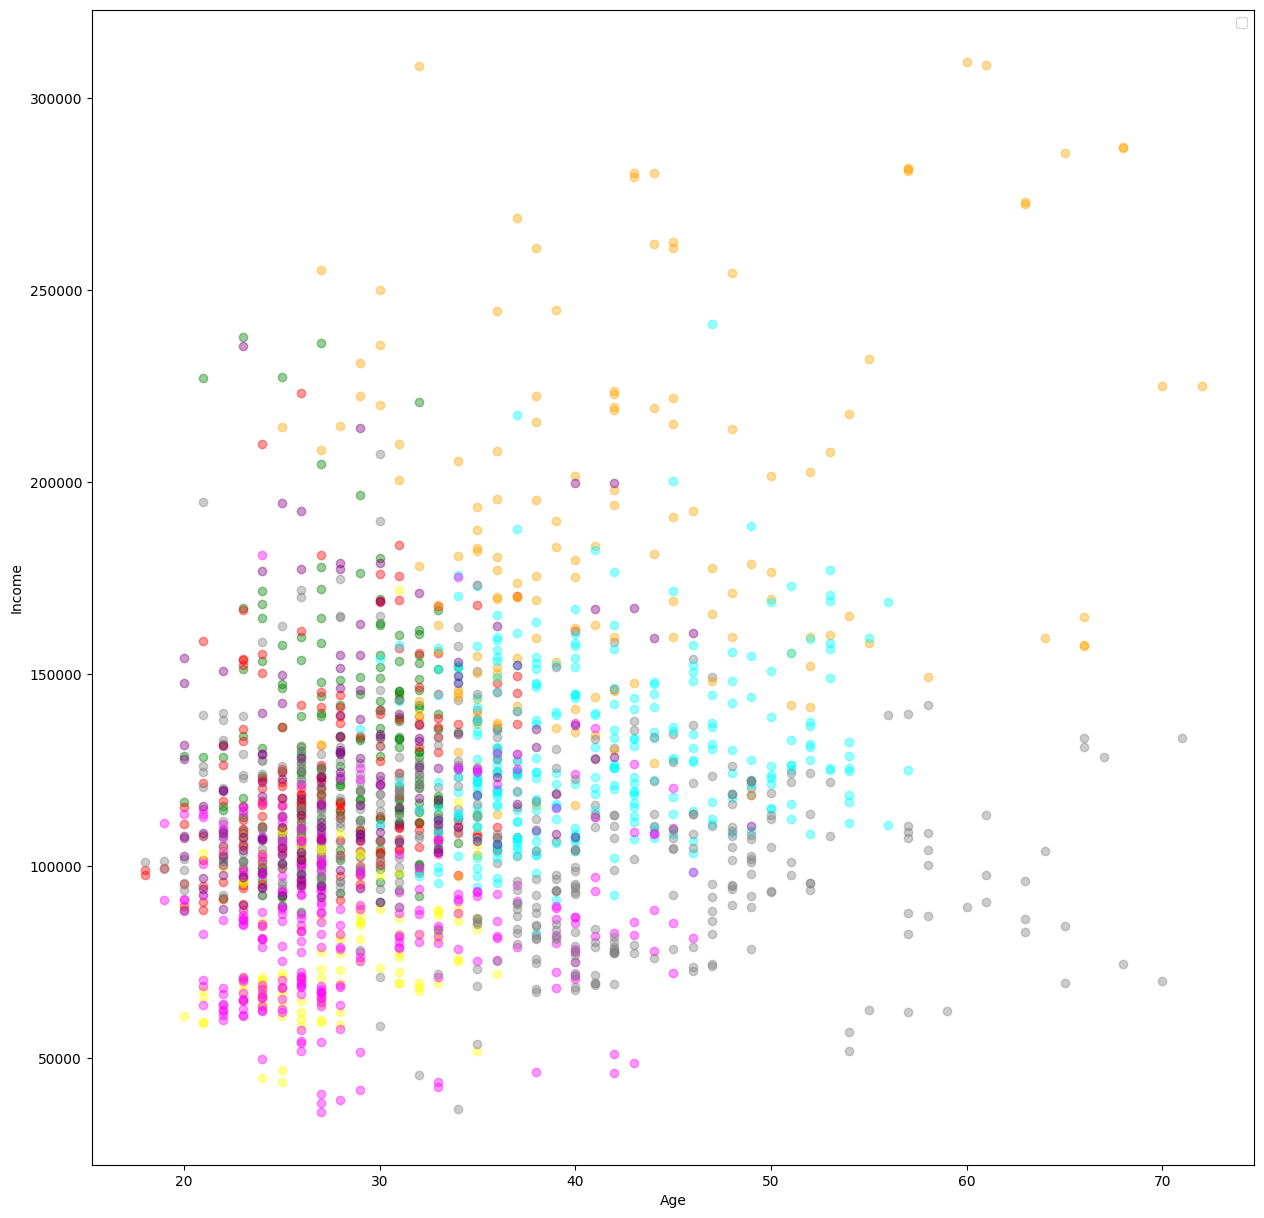

In [11]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==6]
df7 = df[df.cluster==7]
df8 = df[df.cluster==8]
df9 = df[df.cluster==9]
df10 = df[df.cluster==10]


plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

plt.scatter(df1.Age, df1['Income'],color='green', alpha = 0.4)
plt.scatter(df2.Age, df2['Income'],color='red', alpha = 0.4)
plt.scatter(df3.Age, df3['Income'],color='gray', alpha = 0.4)
plt.scatter(df4.Age, df4['Income'],color='orange', alpha = 0.4)
plt.scatter(df5.Age, df5['Income'],color='yellow', alpha = 0.4)
plt.scatter(df6.Age, df6['Income'],color='cyan', alpha = 0.4)
plt.scatter(df7.Age, df7['Income'],color='magenta', alpha = 0.4)
plt.scatter(df8.Age, df8['Income'],color='gray', alpha = 0.4)
plt.scatter(df9.Age, df9['Income'],color='purple', alpha = 0.4)
plt.scatter(df10.Age, df10['Income'],color='blue', alpha = 0.4)

plt.legend()
plt.show()